# **IMDB Dataset of 50K Movie Reviews**

**Author** : SamiUllah568

**About Dataset**

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.


**Context**: 

The IMDB dataset is widely used for sentiment analysis, particularly in the field of Natural Language Processing (NLP). It contains 50,000 movie reviews labeled as positive or negative. The dataset offers a substantial amount of data, allowing for more accurate and robust sentiment classification models compared to smaller datasets used in earlier benchmarks. It is typically used for binary classification tasks, where the objective is to classify each review as either positive or negative.

**Aim**: 

The primary aim of this project is to predict the sentiment of movie reviews using classification algorithms****


**Specifically, the goal is to**

1.  Preprocess the text data (such as tokenization, removing stop words, stemming, etc.).
  
2.  Train a model to classify movie reviews as positive or negative.

3. Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1-score


4. Experiment with different algorithms like traditional machine learning models (e.g., Logistic Regression, Random Forest) 

**Import Necessory Libraies**

In [34]:
import re

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


**Load DataSet**

In [2]:
movies = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
movies.shape

(50000, 2)

In [3]:
movies = movies.sample(10000)

In [4]:
# Show Top 5 Rows
movies.head(5)

,review,sentiment
16787,"Rated R for Strong Language,Violent Content an...",positive
47618,This is undoubtedly one of the funniest movies...,positive
17874,This hugely entertaining short is considered o...,positive
46056,The lament and almost unbearable melancholy of...,positive
8204,This is a top car flick (Its a work of art/ YE...,positive


# **Data Analysis**

In [5]:
# Missing Values Check
movies.isnull().sum()

review       0
sentiment    0
dtype: int64

**Handling Duplicated Values**

In [6]:
print("Duplicated Values --->> ",movies.duplicated().sum())
print("Before Drop duplicated values Size of Data Set -->> ",movies.shape)
print("Duplicated values -->> ",movies.duplicated().sum())
movies.drop_duplicates(inplace=True)
print("Drop Duplicates Successfully")
print("After Drop duplicated values Size of Data Set -->> ",movies.shape)
print("Duplicated Values --->> ",movies.duplicated().sum())

Duplicated Values --->>  18
Before Drop duplicated values Size of Data Set -->>  (10000, 2)
Duplicated values -->>  18
Drop Duplicates Successfully
After Drop duplicated values Size of Data Set -->>  (9982, 2)
Duplicated Values --->>  0


**Sentiment Distribution Analysis**

*  The dataset exhibits a balanced distribution of sentiments.

In [7]:
movies["sentiment"].value_counts()

sentiment
negative    5016
positive    4966
Name: count, dtype: int64

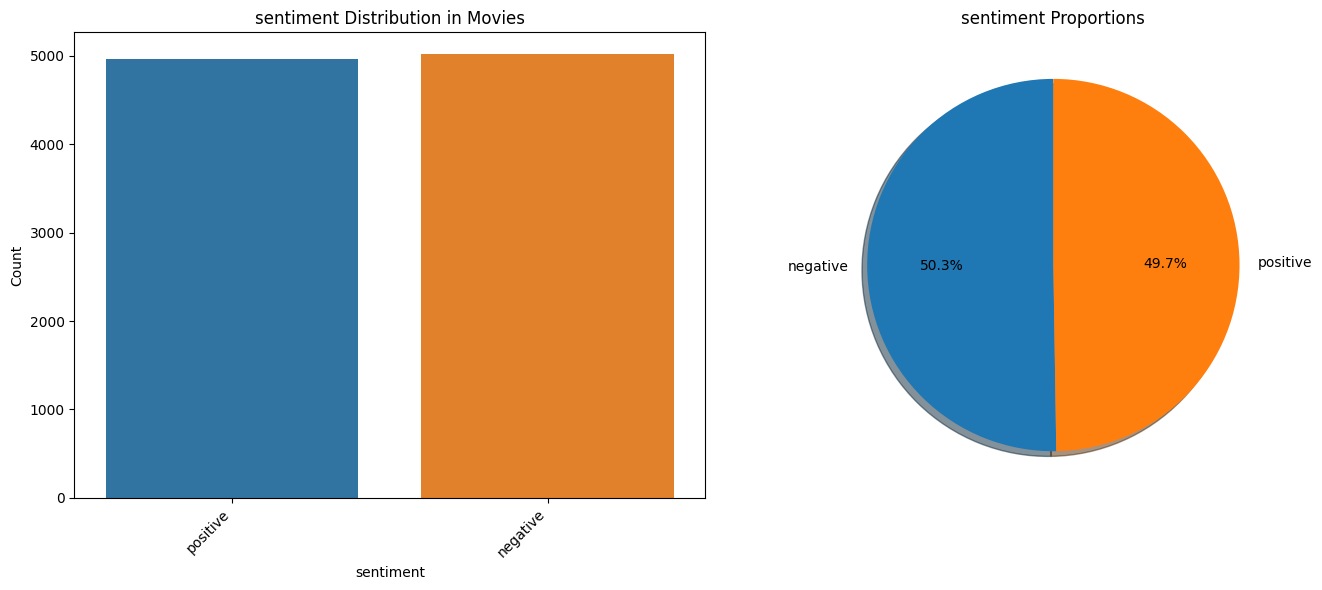

In [8]:
# Creating the subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Countplot for sentiment
sns.countplot(data=movies, x="sentiment", ax=ax[0])
ax[0].set_title("sentiment Distribution in Movies")
ax[0].set_xlabel("sentiment")
ax[0].set_ylabel("Count")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

# Pie chart for sentiment value counts
sentiment_counts = movies["sentiment"].value_counts()
ax[1].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax[1].set_title("sentiment Proportions")

# Display the plot
plt.tight_layout()
plt.show()


# **Preprocessing**

* Handiling html Tags
* Lower Case
* Stopwords Removing
* puncuation Removing
* 

**Remoing html Tags**

In [9]:
def remove_htmltags(text):
    text = re.sub('<.*?>', '', text)
    return text

movies["review"] = movies["review"].apply(remove_htmltags)


**Lower Case**

In [10]:
movies["review"] = movies["review"].str.lower()

**Remove Punctuation**

In [11]:
import string

exclude = string.punctuation

def remove_pun(text):
    return text.translate(str.maketrans('','',exclude))

movies["review"] = movies["review"].apply(remove_pun)


In [12]:
movies.head(2)

,review,sentiment
16787,rated r for strong languageviolent content and...,positive
47618,this is undoubtedly one of the funniest movies...,positive


**Tokenization**

In [13]:
import spacy

nlp = spacy.load('en_core_web_sm')

def tokenize_text(text):
    new_text=[]
    doc = nlp(text)
    for token in doc:
      new_text.append(token.text)
    text = new_text[:]
    new_text.clear()
    return text

movies["review"] = movies["review"].apply(tokenize_text)

In [14]:
movies.head(2)

,review,sentiment
16787,"[rated, r, for, strong, languageviolent, conte...",positive
47618,"[this, is, undoubtedly, one, of, the, funniest...",positive


**StopWords Removing**

In [15]:
from nltk.corpus import stopwords

def remove_stopwords(text):

    new_text = []

    for word in text:
        if word in stopwords.words('english'):
            new_text.append('')

        else:
            new_text.append(word)

    text = new_text[:]
    return text

movies["review"] = movies["review"].apply(remove_stopwords)


In [16]:
movies["review"] = movies["review"].apply(lambda x: [word for word in x if word != ' '])
movies["review"] = movies["review"].apply(lambda x: [word for word in x if word != ''])

In [17]:
movies.head()

,review,sentiment
16787,"[rated, r, strong, languageviolent, content, n...",positive
47618,"[undoubtedly, one, funniest, movies, ever, mad...",positive
17874,"[hugely, entertaining, short, considered, one,...",positive
46056,"[lament, almost, unbearable, melancholy, amali...",positive
8204,"[top, car, flick, work, art, yer, work, art, c...",positive


**Stemming**

In [18]:
from nltk.stem import PorterStemmer

ps= PorterStemmer()

def stem_word(text):
    text = [ps.stem(word) for word in text]
    return text

movies["review"] = movies["review"].apply(stem_word)

In [19]:
movies["review"] = movies["review"].apply(lambda x: ' '.join(x))

# **Vectorizer**

In [20]:
X= movies["review"]
y= movies["sentiment"]

x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

x_train.shape, y_train.shape,x_test.shape,y_test.shape

((7985,), (7985,), (1997,), (1997,))

In [21]:
x_train.head()

28294    saw film mani year ago absolut hate could wait...
1949     southern cross written direct jame becket wast...
28640    tim meadow underr snl recent cast member initi...
35490    nurs charlott bealeth love rosi holotikha arri...
6691     look comment amaz nt warn potenti viewer look ...
Name: review, dtype: object

# **BOW(Bag of Words)**

In [22]:
vectorizer = CountVectorizer(max_features = 5000)
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)
x_train.shape, x_test.shape

((7985, 5000), (1997, 5000))

In [23]:
# 0 -- >> positive , 1 -->>  negative
encode = LabelEncoder()

y_train = encode.fit_transform(y_train)
y_test = encode.transform(y_test)

# **Model Trainning**

**Model -- 1 -->> LogisticRegressor**

In [45]:
log_reg = LogisticRegression(penalty='l2',random_state=42,max_iter=300,verbose=1)

log_reg.fit(x_train,y_train)

train_pred = log_reg.predict(x_train)
test_pred = log_reg.predict(x_test)


sco_train = accuracy_score(y_train, train_pred)
sco_test = accuracy_score(y_test, test_pred)

rep_train = classification_report(y_train, train_pred)
rep_test = classification_report(y_test, test_pred)
print("Train performance -- >> ")
print("score train -->> ", sco_train )
print(rep_train )

print(confusion_matrix(y_train, train_pred))

print("Train performance -- >> ")
print("score train -->> ", sco_test )
print(rep_test )
print(confusion_matrix(y_test, test_pred))


Train performance -- >> 
score train -->>  0.996117720726362
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3981
           1       1.00      1.00      1.00      4004

    accuracy                           1.00      7985
   macro avg       1.00      1.00      1.00      7985
weighted avg       1.00      1.00      1.00      7985

[[3966   15]
 [  16 3988]]
Train performance -- >> 
score train -->>  0.85628442663996
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1035
           1       0.85      0.86      0.85       962

    accuracy                           0.86      1997
   macro avg       0.86      0.86      0.86      1997
weighted avg       0.86      0.86      0.86      1997

[[887 148]
 [139 823]]


**Model -- 2 -->> MultinomialNB**

In [29]:
mnb = MultinomialNB()

mnb.fit(x_train,y_train)

train_pred = mnb.predict(x_train)
test_pred = mnb.predict(x_test)


sco_train = accuracy_score(y_train, train_pred)
sco_test = accuracy_score(y_test, test_pred)

rep_train = classification_report(y_train, train_pred)
rep_test = classification_report(y_test, test_pred)
print("Train performance -- >> ")
print("score train -->> ", sco_train )
print(rep_train )

print(confusion_matrix(y_train, train_pred))

print("Train performance -- >> ")
print("score train -->> ", sco_test )
print(rep_test )
print(confusion_matrix(y_test, test_pred))


Train performance -- >> 
score train -->>  0.8755165936130245
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      3981
           1       0.89      0.86      0.87      4004

    accuracy                           0.88      7985
   macro avg       0.88      0.88      0.88      7985
weighted avg       0.88      0.88      0.88      7985

[[3537  444]
 [ 550 3454]]
Train performance -- >> 
score train -->>  0.8482724086129194
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1035
           1       0.85      0.83      0.84       962

    accuracy                           0.85      1997
   macro avg       0.85      0.85      0.85      1997
weighted avg       0.85      0.85      0.85      1997

[[896 139]
 [164 798]]


**Model -- 3 -->> Random Forest**

In [47]:
rand_model = RandomForestClassifier(random_state=21)

rand_model.fit(x_train,y_train)

train_pred = rand_model.predict(x_train)
test_pred = rand_model.predict(x_test)


sco_train = accuracy_score(y_train, train_pred)
sco_test = accuracy_score(y_test, test_pred)

rep_train = classification_report(y_train, train_pred)
rep_test = classification_report(y_test, test_pred)
print("Train performance -- >> ")
print("score train -->> ", sco_train )
print(rep_train )

print(confusion_matrix(y_train, train_pred))

print("Train performance -- >> ")
print("score train -->> ", sco_test )
print(rep_test )
print(confusion_matrix(y_test, test_pred))

Train performance -- >> 
score train -->>  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3981
           1       1.00      1.00      1.00      4004

    accuracy                           1.00      7985
   macro avg       1.00      1.00      1.00      7985
weighted avg       1.00      1.00      1.00      7985

[[3981    0]
 [   0 4004]]
Train performance -- >> 
score train -->>  0.8367551326990486
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1035
           1       0.84      0.82      0.83       962

    accuracy                           0.84      1997
   macro avg       0.84      0.84      0.84      1997
weighted avg       0.84      0.84      0.84      1997

[[883 152]
 [174 788]]


**Model --> 4 -->> XGB**

In [48]:
xgb_model = XGBClassifier(random_state=42)

xgb_model.fit(x_train,y_train)

train_pred = xgb_model.predict(x_train)
test_pred = xgb_model.predict(x_test)


sco_train = accuracy_score(y_train, train_pred)
sco_test = accuracy_score(y_test, test_pred)

rep_train = classification_report(y_train, train_pred)
rep_test = classification_report(y_test, test_pred)
print("Train performance -- >> ")
print("score train -->> ", sco_train )
print(rep_train )

print(confusion_matrix(y_train, train_pred))

print("Train performance -- >> ")
print("score train -->> ", sco_test )
print(rep_test )
print(confusion_matrix(y_test, test_pred))


Train performance -- >> 
score train -->>  0.97407639323732
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3981
           1       0.97      0.98      0.97      4004

    accuracy                           0.97      7985
   macro avg       0.97      0.97      0.97      7985
weighted avg       0.97      0.97      0.97      7985

[[3846  135]
 [  72 3932]]
Train performance -- >> 
score train -->>  0.8332498748122183
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1035
           1       0.82      0.84      0.83       962

    accuracy                           0.83      1997
   macro avg       0.83      0.83      0.83      1997
weighted avg       0.83      0.83      0.83      1997

[[855 180]
 [153 809]]


**Model --> 4 -->> SVC**

In [49]:
svr = SVC(C=1.0,tol=0.001,random_state=42)

svr.fit(x_train,y_train)

train_pred = svr.predict(x_train)
test_pred = svr.predict(x_test)


sco_train = accuracy_score(y_train, train_pred)
sco_test = accuracy_score(y_test, test_pred)

rep_train = classification_report(y_train, train_pred)
rep_test = classification_report(y_test, test_pred)
print("Train performance -- >> ")
print("score train -->> ", sco_train )
print(rep_train )

print(confusion_matrix(y_train, train_pred))

print("Train performance -- >> ")
print("score train -->> ", sco_test )
print(rep_test )
print(confusion_matrix(y_test, test_pred))


Train performance -- >> 
score train -->>  0.956668753913588
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      3981
           1       0.95      0.96      0.96      4004

    accuracy                           0.96      7985
   macro avg       0.96      0.96      0.96      7985
weighted avg       0.96      0.96      0.96      7985

[[3788  193]
 [ 153 3851]]
Train performance -- >> 
score train -->>  0.8517776664997496
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1035
           1       0.83      0.87      0.85       962

    accuracy                           0.85      1997
   macro avg       0.85      0.85      0.85      1997
weighted avg       0.85      0.85      0.85      1997

[[860 175]
 [121 841]]


# **MODEL SAVING**

In [55]:
import pickle

# Save the BoW vectorizer
with open("bow.pkl", 'wb') as f1:
    pickle.dump(vectorizer, f1) 

with open("log_reg.pkl", 'wb') as f2:
    pickle.dump(log_reg, f2)  
    
with open("encode.pkl", 'wb') as f3:
    pickle.dump(encode, f3)  


# **Model Load**

In [56]:
# Load the BoW vectorizer
with open("bow.pkl", 'rb') as f1:
    bow = pickle.load(f1)  

# Load the logistic regression model
with open("log_reg.pkl", 'rb') as f2:
    log_reg = pickle.load(f2)
    
with open("encode.pkl", 'rb') as f3:
    encode = pickle.load(f3)


In [64]:
def prediction(text):
    text = text.lower()
    text = remove_pun(text)
    text = tokenize_text(text)
    text = remove_stopwords(text)
    text = stem_word(text)

    text = " ".join(text)
    
    vectors = bow.transform([text])
    prediction = log_reg.predict(vectors)
    return encode.inverse_transform(prediction)[0]
    

In [67]:
text = "This is very bad movie and i eally dislike this movie"
prediction(text)

'negative'

In [68]:
text = "This is very good movie and i really like and love  this movie"
prediction(text)

'positive'